### Load Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Real World Examples
Download data from Github
### Line Graph

0     1990
3     1993
6     1996
9     1999
12    2002
15    2005
18    2008
Name: Year, dtype: int64


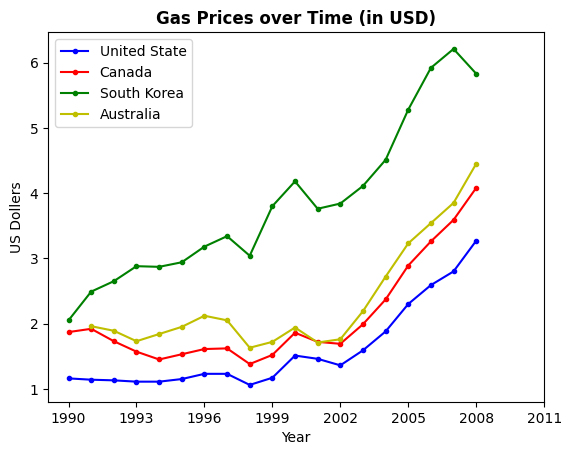

In [50]:
gas = pd.read_csv('gas_prices.csv')
plt.title('Gas Prices over Time (in USD)', fontdict={'fontweight': 'bold'})

plt.plot(gas.Year, gas.USA, 'b.-', label='United State')
plt.plot(gas['Year'], gas.Canada, 'r.-', label='Canada')
plt.plot(gas['Year'], gas['South Korea'], 'g.-', label='South Korea')
plt.plot(gas['Year'], gas['Australia'], 'y.-', label='Australia')

# countries_to_look_at = ['Australia', 'Canada','USA','South Korea']
# for country in gas:
#     if country in countries_to_look_at:
#         plt.plot(gas.Year, gas[country], marker='.')

print(gas.Year[::3])

plt.xticks(gas.Year[::3].tolist()+[2011])

plt.xlabel('Year')
plt.ylabel('US Dollers')

plt.legend()
plt.savefig('gas_price_figure.png', dpi=300)
plt.show()

### Load Fifa Data

In [54]:
fifa = pd.read_csv('fifa_data.csv')

fifa.head(5)

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

### Histagram

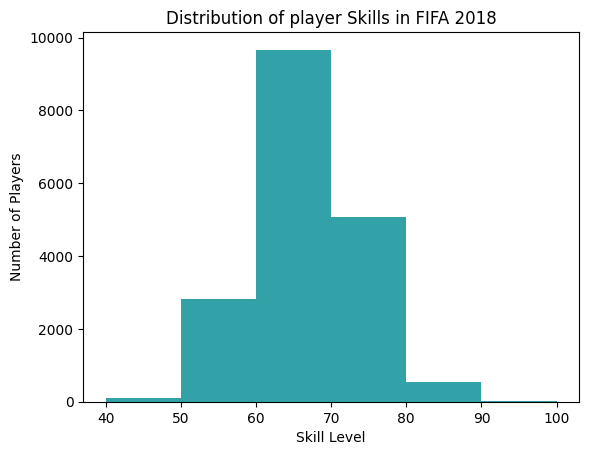

In [64]:

bins = [40,50,60,70,80,90,100]

plt.hist(fifa.Overall, bins=bins, color='#32a2a8')

plt.xticks(bins)

plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of player Skills in FIFA 2018')
plt.show()

### Pie Chart

/tmp/ipykernel_127558/1604164619.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
/tmp/ipykernel_127558/1604164619.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]


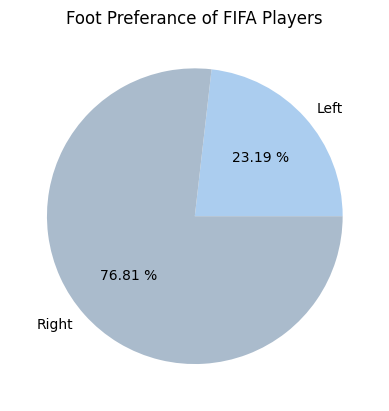

In [80]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left', 'Right']
colors = ['#abcdef', '#aabbcc']

plt.pie([left, right], labels = labels, colors=colors, autopct = '%.2f %%')

plt.title('Foot Preferance of FIFA Players')
plt.show()

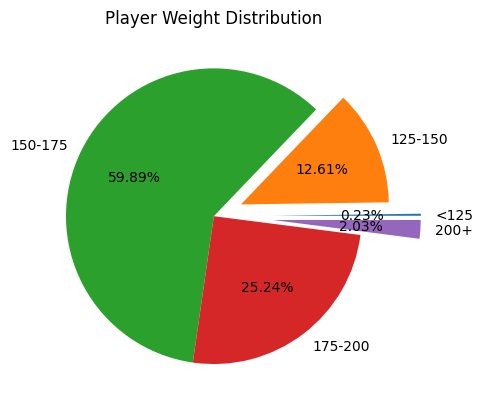

In [88]:
# Clean up 'Weight' column first
fifa.Weight = [int(x.strip('lbs')) if isinstance(x, str) else x for x in fifa.Weight]

# Group counts
light = fifa.loc[fifa.Weight < 125].count().iloc[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count().iloc[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count().iloc[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count().iloc[0]
heavy = fifa.loc[fifa.Weight >= 200].count().iloc[0]

# Plot pie chart
labels = ['<125', '125-150', '150-175', '175-200', '200+']
weights = [light, light_medium, medium, medium_heavy, heavy]

explode =(.4,.2, 0,0,.4)

plt.pie(weights, labels=labels, autopct='%.2f%%', explode=explode)
plt.title("Player Weight Distribution")
plt.show()
